# scikit-learn カリフォルニア住宅価格データの前処理に関する見解

前処理に利用したソースコードです。コピペ可です。

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [2]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['Price'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

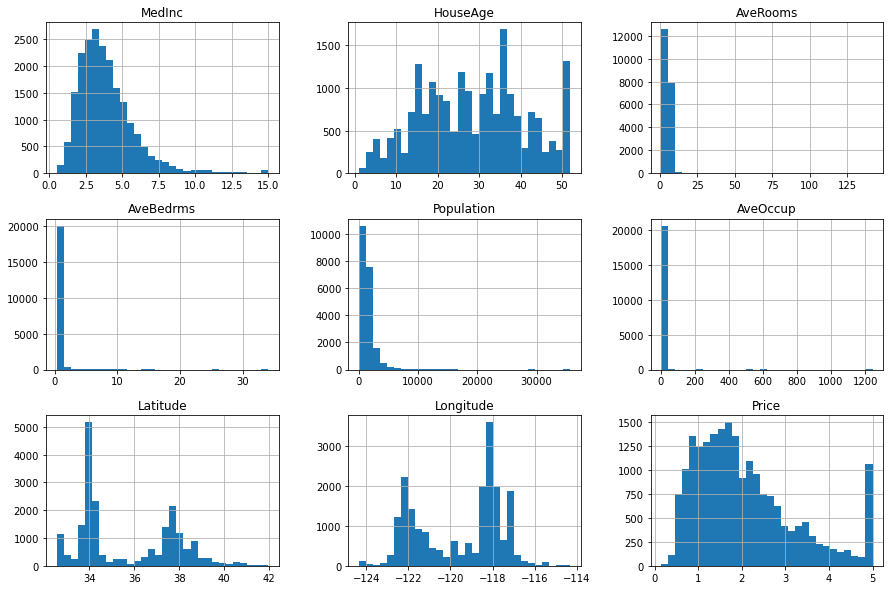

In [5]:
df.hist(bins=30, figsize=(15, 10))

<AxesSubplot:xlabel='AveRooms', ylabel='AveBedrms'>

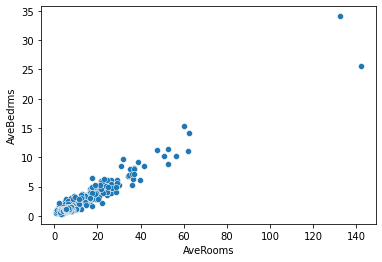

In [6]:
sns.scatterplot(data=df, x='AveRooms', y='AveBedrms')

In [7]:
df.query('AveRooms > 100')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [8]:
df['Household'] = df['Population']/df['AveOccup']
df['AllRooms'] = df['AveRooms']*df['Household']
df['AllBedrms'] = df['AveBedrms']*df['Household']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Household,AllRooms,AllBedrms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,126.0,880.0,129.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1138.0,7099.0,1106.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,177.0,1467.0,190.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,219.0,1274.0,235.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,259.0,1627.0,280.0


array([[<AxesSubplot:title={'center':'Household'}>,
        <AxesSubplot:title={'center':'AllRooms'}>],
       [<AxesSubplot:title={'center':'AllBedrms'}>, <AxesSubplot:>]],
      dtype=object)

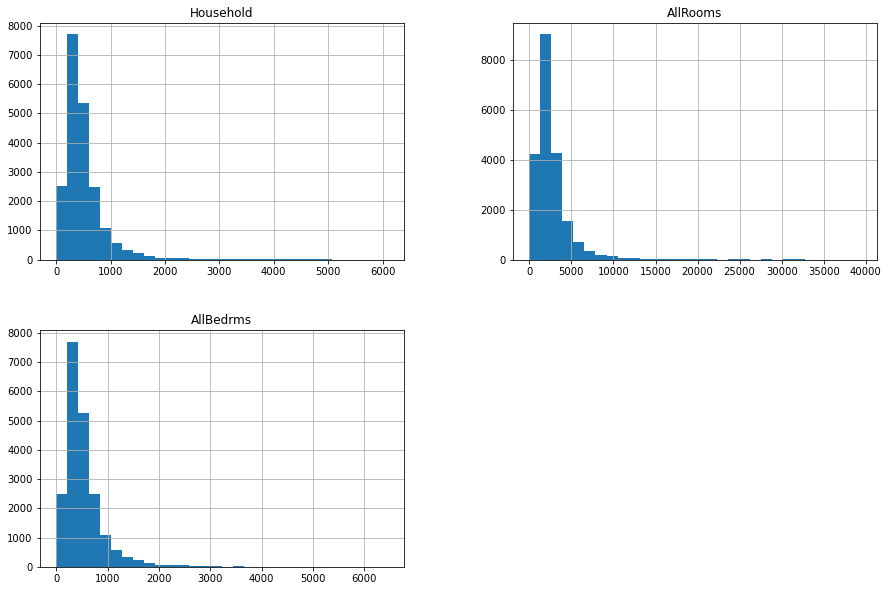

In [9]:
df[['Household', 'AllRooms', 'AllBedrms']].hist(bins=30, figsize=(15, 10))

<AxesSubplot:xlabel='AllRooms', ylabel='AllBedrms'>

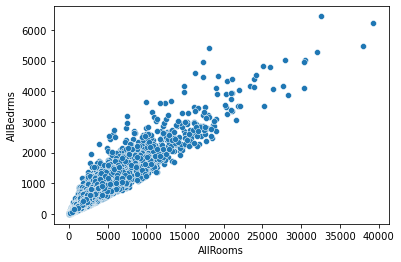

In [10]:
sns.scatterplot(data=df, x='AllRooms', y='AllBedrms')

<AxesSubplot:>

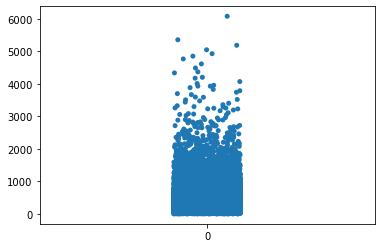

In [11]:
sns.stripplot(data = df['Household'])

この3つの値を使うべきであろう。

<AxesSubplot:>

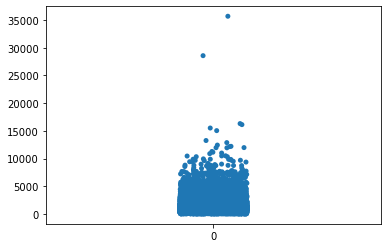

In [12]:
sns.stripplot(data = df['Population'])

In [13]:
df.query('Population > 20000')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Household,AllRooms,AllBedrms
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.188,6082.0,32627.0,6445.0
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.344,4769.0,25135.0,4819.0


<AxesSubplot:>

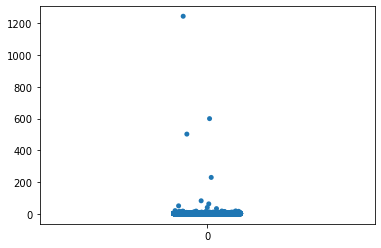

In [14]:
sns.stripplot(data = df['AveOccup'])

In [15]:
df.query('AveOccup > 200')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Household,AllRooms,AllBedrms
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675,7.0,36.0,8.0
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250,29.0,240.0,44.0
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500,13.0,118.0,17.0
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375,6.0,19.0,5.0


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

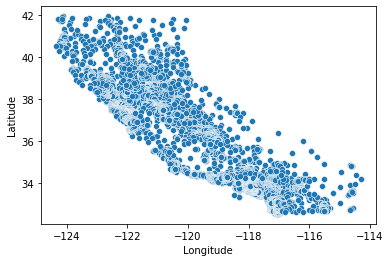

In [16]:
sns.scatterplot(data=df, x='Longitude', y='Latitude')

In [17]:
print(df.query('HouseAge == 52').shape)
print(df.query('Price == 5.00001').shape)

(1273, 12)
(965, 12)


In [18]:
df = df[df['HouseAge'] != 52]
df = df[df['Price'] != 5.00001]

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Household'}>,
        <AxesSubplot:title={'center':'AllRooms'}>,
        <AxesSubplot:title={'center':'AllBedrms'}>]], dtype=object)

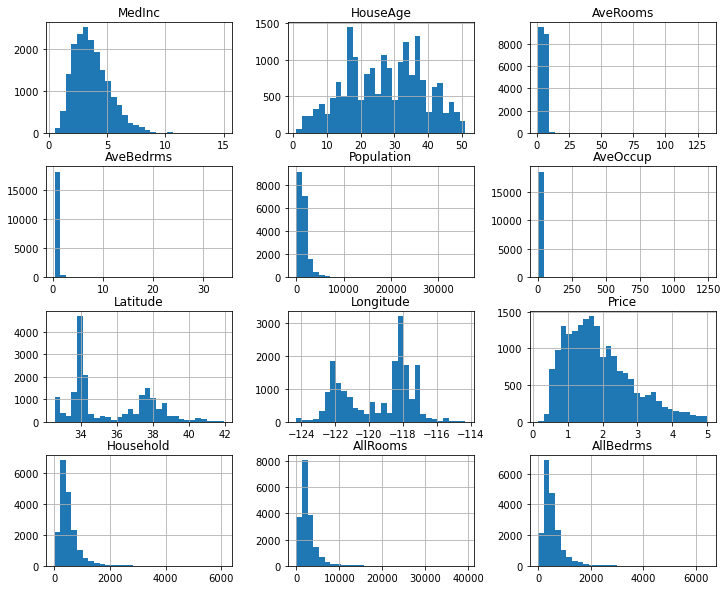

In [19]:
df.hist(figsize=(12, 10), bins=30)

In [20]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Household,AllRooms,AllBedrms
MedInc,1.000000,-0.202770,0.317261,-0.066044,0.040534,0.025530,-0.075305,-0.016145,0.661039,0.045643,0.223310,0.021076
HouseAge,-0.202770,1.000000,-0.181164,-0.087112,-0.280775,0.019662,-0.051961,-0.033877,0.014772,-0.310576,-0.374710,-0.330830
AveRooms,0.317261,-0.181164,1.000000,0.848991,-0.073703,-0.007024,0.129783,-0.038061,0.113842,-0.078640,0.140969,0.012836
AveBedrms,-0.066044,-0.087112,0.848991,1.000000,-0.072199,-0.007870,0.077233,0.011194,-0.060614,-0.059653,0.032474,0.048635
Population,0.040534,-0.280775,-0.073703,-0.072199,1.000000,0.065305,-0.106927,0.090809,0.021616,0.910626,0.860083,0.880559
AveOccup,0.025530,0.019662,-0.007024,-0.007870,0.065305,1.000000,0.002198,0.000944,-0.020347,-0.026359,-0.023949,-0.027448
Latitude,-0.075305,-0.051961,0.129783,0.077233,-0.106927,0.002198,1.000000,-0.922726,-0.172126,-0.070068,-0.027165,-0.064304
Longitude,-0.016145,-0.033877,-0.038061,0.011194,0.090809,0.000944,-0.922726,1.000000,-0.022165,0.050621,0.035260,0.064069
Price,0.661039,0.014772,0.113842,-0.060614,0.021616,-0.020347,-0.172126,-0.022165,1.000000,0.100220,0.152606,0.080789
Household,0.045643,-0.310576,-0.078640,-0.059653,0.910626,-0.026359,-0.070068,0.050621,0.100220,1.000000,0.921867,0.978932
